# Stack Overflow 2017 Survey Data Analysis

 Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. This year, they amassed more than 64,000 responses fielded from 213 countries.

 i'll be analyzing the data to find patterns and answer questions that will help us understand the data better, i will be following CRISP-DM process step by step to reach my intended results
 1. Business Understanding
 2. Data Understanding
 3. Data Preparation
 4. Data Modelling
 5. Evaluate the Results




## 1. Business understanding

1. How education may influence the salary?
2. Gender Ratio of developers across the globe
3. The rate of increase in salary with the years of experience
4. countries with highest pay

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding & Preparation

In [4]:
list(df.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [5]:
#choosing only the columns that are relevant in answering the questions
df_new = df[['Country','Gender', 'FormalEducation', 'YearsProgram', 'JobSecurity', 'Salary']]

In [6]:
df_new.head()

,Country,Gender,FormalEducation,YearsProgram,JobSecurity,Salary
0,United States,Male,Secondary school,2 to 3 years,Strongly agree,NaN
1,United Kingdom,Male,Some college/university study without earning ...,9 to 10 years,NaN,NaN
2,United Kingdom,Male,Bachelor's degree,20 or more years,Agree,113750.0
3,United States,Male,Doctoral degree,14 to 15 years,Somewhat agree,NaN
4,Switzerland,NaN,Master's degree,20 or more years,NaN,NaN


In [7]:
df_new.hist

<bound method hist_frame of               Country  Gender  \
0       United States    Male   
1      United Kingdom    Male   
2      United Kingdom    Male   
3       United States    Male   
4         Switzerland     NaN   
5         New Zealand     NaN   
6       United States    Male   
7              Poland    Male   
8            Colombia    Male   
9              France    Male   
10      United States  Female   
11             Canada     NaN   
12     United Kingdom    Male   
13            Germany  Female   
14     United Kingdom    Male   
15      United States    Male   
16     United Kingdom    Male   
17      United States    Male   
18      United States     NaN   
19             Greece    Male   
20             Brazil     NaN   
21     United Kingdom    Male   
22             Israel    Male   
23              Italy    Male   
24            Belgium     NaN   
25      United States    Male   
26              India     NaN   
27      United States     NaN   
28             

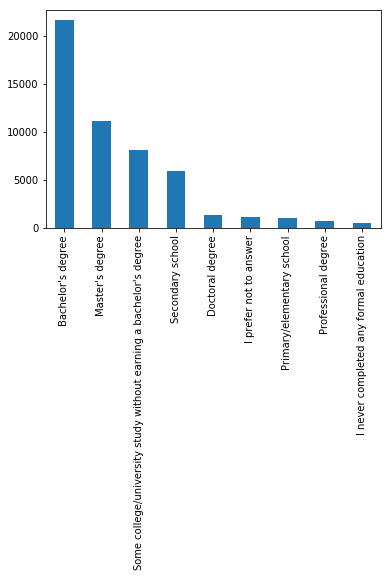

In [8]:
df_new.FormalEducation.value_counts().plot(kind='bar');

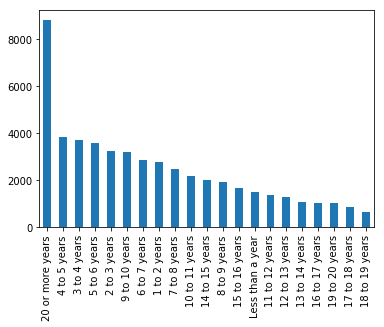

In [9]:
df_new.YearsProgram.value_counts().plot(kind='bar')

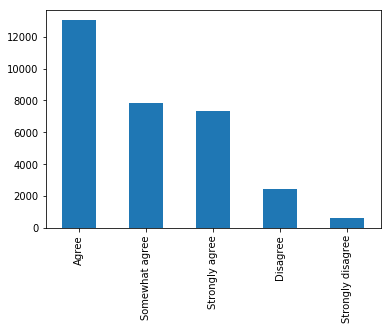

In [10]:
df.JobSecurity.value_counts().plot(kind='bar');

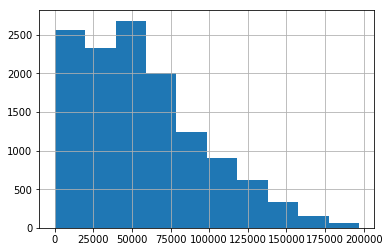

In [11]:
df_new.Salary.hist();

In [12]:
df_clean = df_new.copy()

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 6 columns):
Country            51392 non-null object
Gender             35047 non-null object
FormalEducation    51392 non-null object
YearsProgram       51145 non-null object
JobSecurity        31240 non-null object
Salary             12891 non-null float64
dtypes: float64(1), object(5)
memory usage: 2.4+ MB


In [14]:
#remove rows where Salary is Null
df_clean.dropna(subset = ['Salary'], inplace = True)

In [15]:
df_clean.JobSecurity.fillna("No response", inplace = True)

In [16]:
df_clean.Gender.value_counts()

Male                                                       10666
Female                                                       819
Other                                                         49
Male; Other                                                   44
Gender non-conforming                                         43
Male; Gender non-conforming                                   21
Female; Transgender                                           19
Female; Gender non-conforming                                 13
Transgender                                                    8
Male; Female; Transgender; Gender non-conforming; Other        6
Male; Female                                                   5
Transgender; Gender non-conforming                             4
Male; Transgender                                              4
Female; Transgender; Gender non-conforming                     3
Female; Transgender; Other                                     1
Male; Transgender; Other 

In [17]:
df_clean2 = df_clean[df_clean['Gender'].isin(['Male', 'Female'])]


In [18]:
df_clean2.dropna(inplace= True)

C:\Users\Rouk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11477 entries, 2 to 51390
Data columns (total 6 columns):
Country            11477 non-null object
Gender             11477 non-null object
FormalEducation    11477 non-null object
YearsProgram       11477 non-null object
JobSecurity        11477 non-null object
Salary             11477 non-null float64
dtypes: float64(1), object(5)
memory usage: 627.6+ KB


In [20]:
df_clean2.head()

,Country,Gender,FormalEducation,YearsProgram,JobSecurity,Salary
2,United Kingdom,Male,Bachelor's degree,20 or more years,Agree,113750.0
14,United Kingdom,Male,Professional degree,20 or more years,Somewhat agree,100000.0
17,United States,Male,Bachelor's degree,20 or more years,Agree,130000.0
22,Israel,Male,Bachelor's degree,10 to 11 years,No response,100764.0
25,United States,Male,Master's degree,20 or more years,Agree,175000.0


### Gender Ratio of developers across the globe

In [22]:
df_gen_mean = df_clean2.groupby(['Gender'], as_index = False)['Salary'].mean()
df_gen_mean

,Gender,Salary
0,Female,58104.420681
1,Male,57006.325810


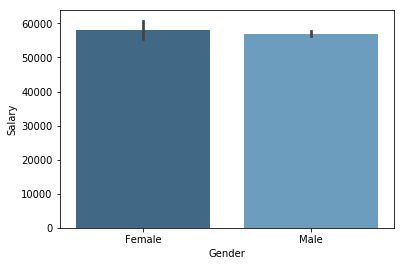

In [24]:
sns.barplot(x = 'Gender', y = 'Salary', data = df_clean2,order= ['Female', 'Male'],  palette='Blues_d')
#average salary is almost the same for both genders

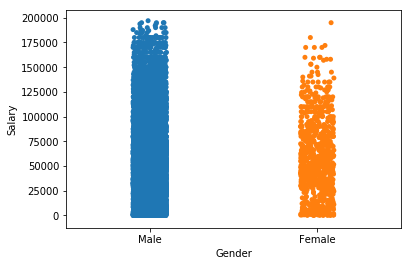

In [25]:
sns.stripplot(x = df_clean2['Gender'], y = df_clean2['Salary'])


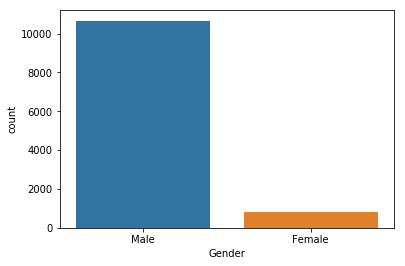

In [26]:
sns.countplot(x= 'Gender', data = df_clean2)


Clearly the Male participants were more than 12 times that of Female participants! Which also makes the analysis non conclusive.

Conclusion
Although the mean salaries for males and females were very close to each other.

The distribution was not consistent: The top salaries (> $150k) are dominated by Men, even though the mean salary for men was slightly lower.
The data isn't conclusive given there are12 times male participants as compared to female participants

### How education may influence the salary?


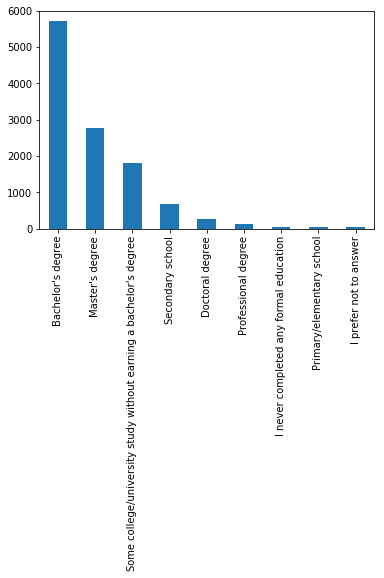

In [27]:
df_clean2.FormalEducation.value_counts().plot(kind='bar');

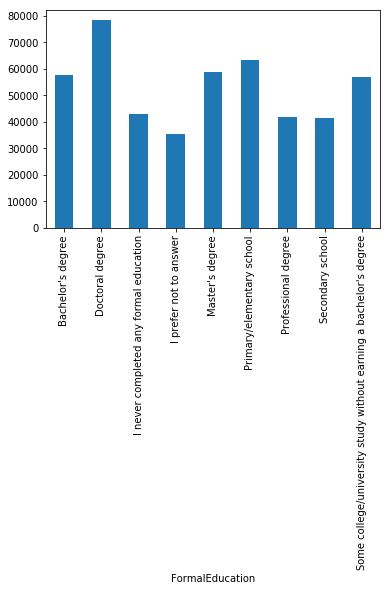

In [159]:
df_clean2.groupby('FormalEducation').mean()['Salary'].plot(kind='bar')

Summary: The developers who own a Doctoral Degree get the highest salary of USD 78,527, followed by Primary/Elementary School graduates at USD 62,677 and Master's Degree holder at normal pay of USD 58,250.

### Countries with highest salaries?

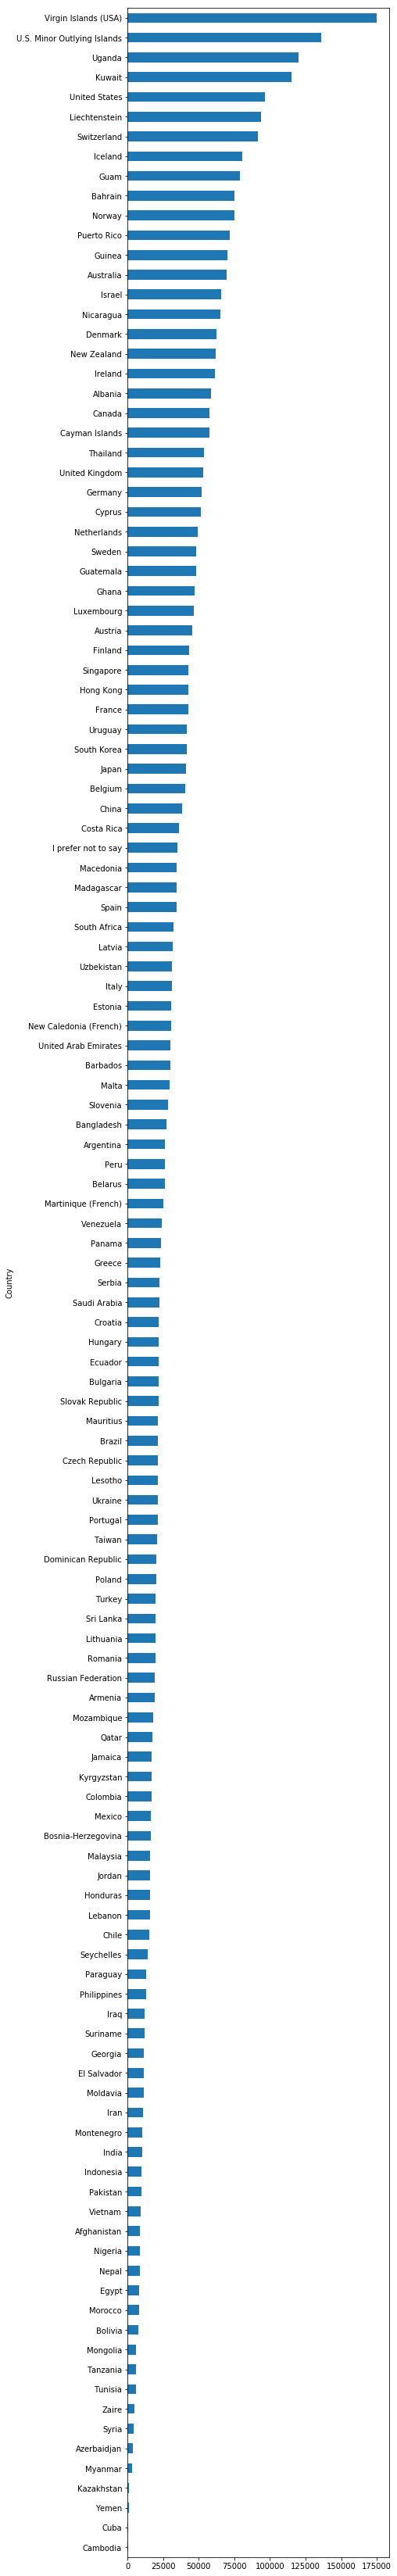

In [29]:
countries = df_clean2.groupby('Country').mean()['Salary'].sort_values(ascending=True)
ax2 = countries.plot.barh(rot=0, figsize=(6, 60))

### The rate of increase in salary with the years of experience


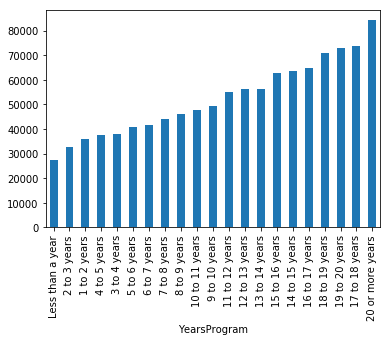

In [30]:
xp = df_clean2.groupby('YearsProgram').mean()['Salary'].sort_values(ascending=True).plot(kind='bar')


### Data Modeling

In [32]:

df_clean2.head()

,Country,Gender,FormalEducation,YearsProgram,JobSecurity,Salary
2,United Kingdom,Male,Bachelor's degree,20 or more years,Agree,113750.0
14,United Kingdom,Male,Professional degree,20 or more years,Somewhat agree,100000.0
17,United States,Male,Bachelor's degree,20 or more years,Agree,130000.0
22,Israel,Male,Bachelor's degree,10 to 11 years,No response,100764.0
25,United States,Male,Master's degree,20 or more years,Agree,175000.0


In [148]:
y=df_clean2['Salary']
x=df_clean2[['Gender', 'FormalEducation', 'YearsProgram', 'JobSecurity']]

In [149]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = x.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], drop_first=True)], axis=1)
        except:
            continue
    return df

In [150]:

df_new = create_dummy_df(x, cat_cols_lst, dummy_na=True) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

(11477, 34)


In [151]:
df_new.head(5)

,Male,Doctoral degree,I never completed any formal education,I prefer not to answer,Master's degree,Primary/elementary school,Professional degree,Secondary school,Some college/university study without earning a bachelor's degree,10 to 11 years,...,6 to 7 years,7 to 8 years,8 to 9 years,9 to 10 years,Less than a year,Disagree,No response,Somewhat agree,Strongly agree,Strongly disagree
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
25,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [153]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3, random_state=4)


In [154]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [155]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [156]:
#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [157]:
print(test_score)
print(train_score)

0.19369120641976445
0.20646426787514638
